# Eda Taxi zones

In [2]:
import pandas as pd

# Load the uploaded CSV file to examine its contents
file_path = 'taxi+_zone_lookup.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head()


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [3]:
dataset.shape


(265, 4)

# Compresión general del dataset

In [4]:
# Dimensiones del dataset
print("Dimensiones del dataset:", dataset.shape)

# Tipos de datos por columna
print("\nTipos de datos:")
print(dataset.dtypes)

# Valores únicos por columna
print("\nValores únicos por columna:")
print(dataset.nunique())


Dimensiones del dataset: (265, 4)

Tipos de datos:
LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object

Valores únicos por columna:
LocationID      265
Borough           7
Zone            261
service_zone      4
dtype: int64


# Outliers 
- En variables numericas 

In [5]:
# Seleccionar columnas numéricas
num_cols = dataset.select_dtypes(include=['float64', 'int64'])

# Identificar outliers usando el rango intercuartílico (IQR)
outliers = {}
for col in num_cols.columns:
    Q1 = num_cols[col].quantile(0.25)
    Q3 = num_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = num_cols[(num_cols[col] < lower_bound) | (num_cols[col] > upper_bound)]

# Mostrar outliers por columna
for col, outliers_data in outliers.items():
    print(f"Outliers en la columna '{col}':")
    print(outliers_data)
    print("\n")


Outliers en la columna 'LocationID':
Empty DataFrame
Columns: [LocationID]
Index: []




- En variables categoricas

In [6]:
# Frecuencia de categorías
cat_cols = dataset.select_dtypes(include=['object'])

# Detectar categorías con baja frecuencia
for col in cat_cols.columns:
    print(f"Frecuencias en la columna '{col}':")
    print(dataset[col].value_counts().tail(5))  # Mostrar las 5 categorías menos frecuentes
    print("\n")


Frecuencias en la columna 'Borough':
Borough
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: count, dtype: int64


Frecuencias en la columna 'Zone':
Zone
Fordham South                1
Forest Hills                 1
Forest Park/Highland Park    1
Fort Greene                  1
NV                           1
Name: count, dtype: int64


Frecuencias en la columna 'service_zone':
service_zone
Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: count, dtype: int64




- Visutalización de outliers

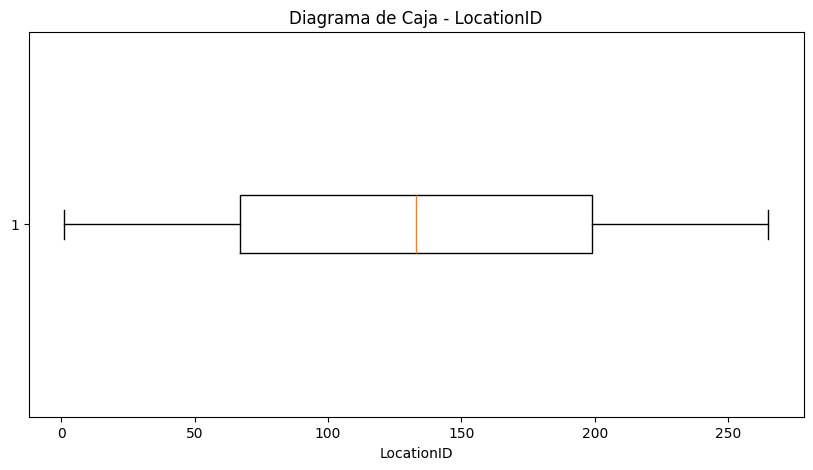

In [7]:
import matplotlib.pyplot as plt

# Boxplots para todas las columnas numéricas
for col in num_cols.columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(num_cols[col].dropna(), vert=False)
    plt.title(f"Diagrama de Caja - {col}")
    plt.xlabel(col)
    plt.show()


# Calidad de los datos 

In [8]:
# Valores nulos por columna
print("\nValores nulos por columna:")
print(dataset.isnull().sum())

# Filas duplicadas
print("\nNúmero de filas duplicadas:", dataset.duplicated().sum())



Valores nulos por columna:
LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

Número de filas duplicadas: 0


# Analisis univariado

In [9]:
# Frecuencia de valores en 'Borough'
print("\nFrecuencia de valores en 'Borough':")
print(dataset['Borough'].value_counts())

# Frecuencia de valores en 'service_zone'
print("\nFrecuencia de valores en 'service_zone':")
print(dataset['service_zone'].value_counts())

# Frecuencia de valores en 'Zone'
print("\nLas 10 zonas más comunes:")
print(dataset['Zone'].value_counts().head(10))



Frecuencia de valores en 'Borough':
Borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: count, dtype: int64

Frecuencia de valores en 'service_zone':
service_zone
Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: count, dtype: int64

Las 10 zonas más comunes:
Zone
Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Newark Airport                                   1
Ocean Hill                                       1
Parkchester                                      1
Park Slope                                       1
Ozone Park                                       1
Old Astoria                                      1
Ocean Parkway South                              1
Oakwood                                          1
Name: count, dtype: int64


# Analisis multivariado

In [10]:
# Relación entre 'Borough' y 'service_zone'
borough_service_zone = dataset.groupby(['Borough', 'service_zone']).size().unstack(fill_value=0)
print("\nRelación entre 'Borough' y 'service_zone':")
print(borough_service_zone)

# Número de zonas por distrito
zones_per_borough = dataset.groupby('Borough')['Zone'].nunique()
print("\nNúmero de zonas únicas por 'Borough':")
print(zones_per_borough)


Relación entre 'Borough' y 'service_zone':
service_zone   Airports  Boro Zone  EWR  Yellow Zone
Borough                                             
Bronx                 0         43    0            0
Brooklyn              0         61    0            0
EWR                   0          0    1            0
Manhattan             0         14    0           55
Queens                2         67    0            0
Staten Island         0         20    0            0

Número de zonas únicas por 'Borough':
Borough
Bronx            43
Brooklyn         61
EWR               1
Manhattan        67
Queens           68
Staten Island    20
Unknown           1
Name: Zone, dtype: int64


# Visualización de datos

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


- Frecuencia y distribución de Borough

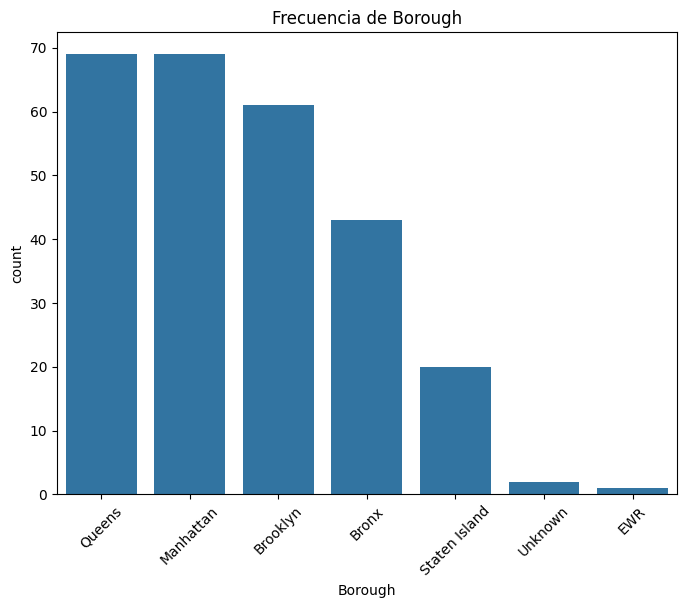

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Borough', order=dataset['Borough'].value_counts().index)
plt.title("Frecuencia de Borough")
plt.xticks(rotation=45)
plt.show()


- Frecuencia de service_zone

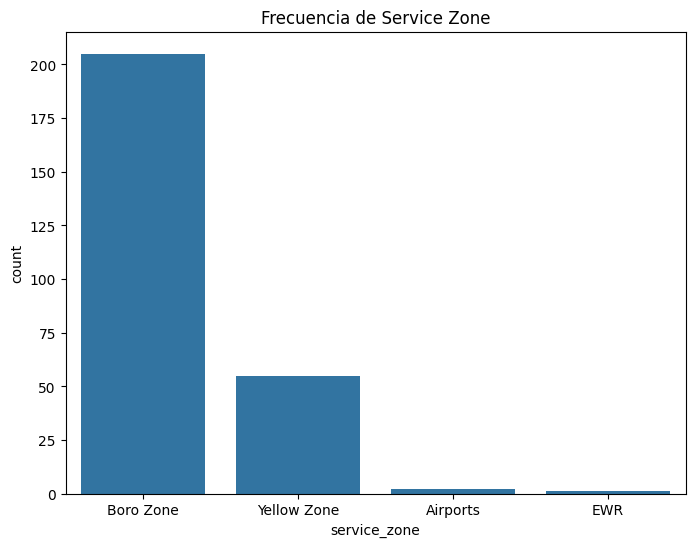

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='service_zone', order=dataset['service_zone'].value_counts().index)
plt.title("Frecuencia de Service Zone")
plt.show()


- Zonas más comunes 

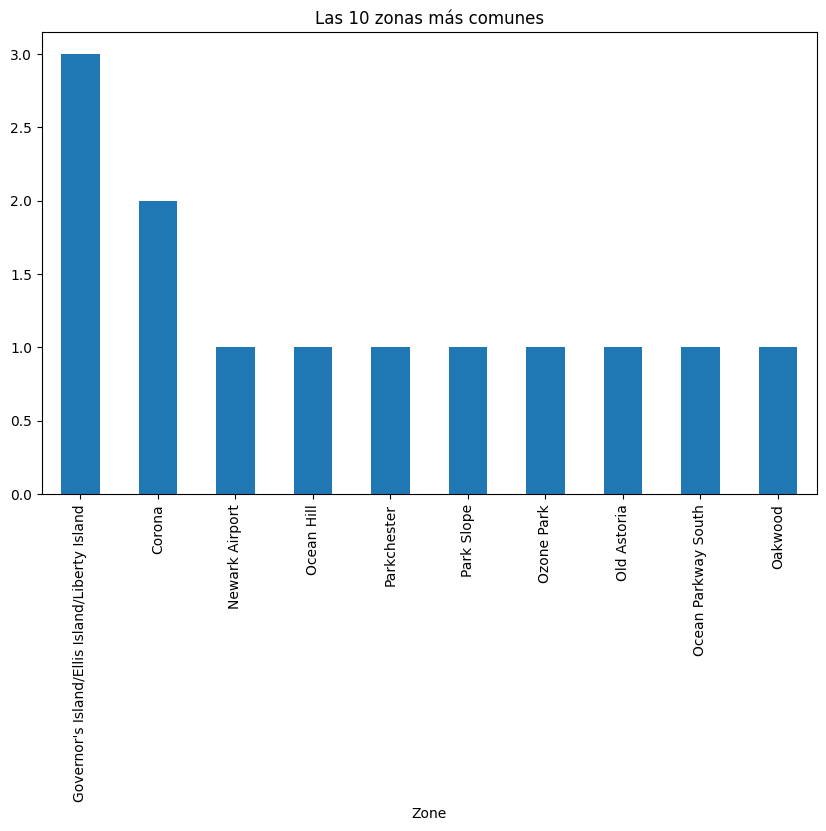

In [14]:
plt.figure(figsize=(10, 6))
dataset['Zone'].value_counts().head(10).plot(kind='bar')
plt.title("Las 10 zonas más comunes")
plt.show()


- Relación entre borough y service_zone (mapa de color)

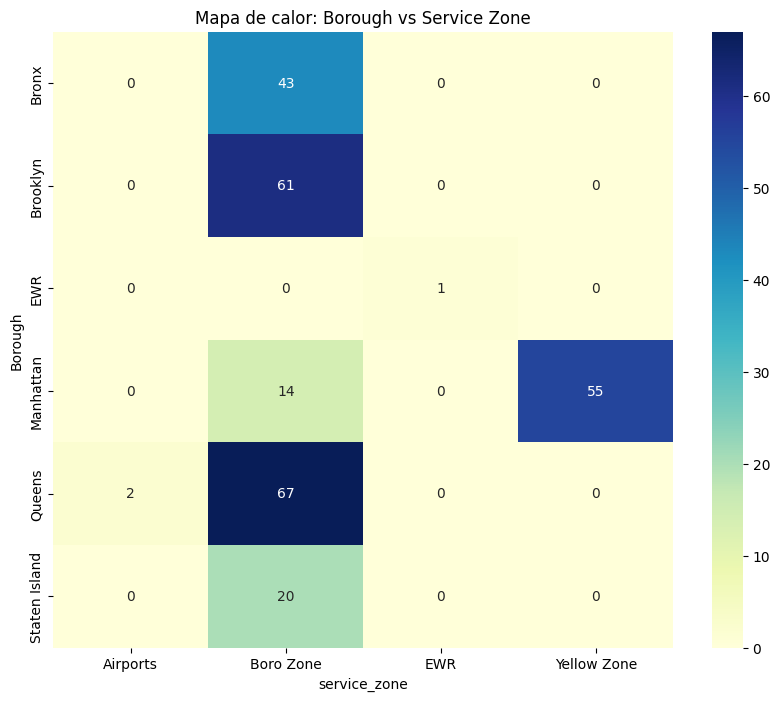

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(borough_service_zone, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Mapa de calor: Borough vs Service Zone")
plt.show()


# Descripción estadistica.

In [16]:
# Resumen general del dataset
print("Resumen general del dataset:")
print(dataset.describe(include='all'))


Resumen general del dataset:
        LocationID Borough                                           Zone  \
count   265.000000     265                                            264   
unique         NaN       7                                            261   
top            NaN  Queens  Governor's Island/Ellis Island/Liberty Island   
freq           NaN      69                                              3   
mean    133.000000     NaN                                            NaN   
std      76.643112     NaN                                            NaN   
min       1.000000     NaN                                            NaN   
25%      67.000000     NaN                                            NaN   
50%     133.000000     NaN                                            NaN   
75%     199.000000     NaN                                            NaN   
max     265.000000     NaN                                            NaN   

       service_zone  
count           263  
un

- Descripción para variables categoricas
Podemos centrarnos en estadísticas relevantes como el recuento, las categorías únicas, la categoría más frecuente (moda) y su frecuencia.

In [17]:
# Estadísticas descriptivas de variables categóricas
categorical_summary = dataset.describe(include=['object'])
print("\nDescripción estadística de variables categóricas:")
print(categorical_summary)



Descripción estadística de variables categóricas:
       Borough                                           Zone service_zone
count      265                                            264          263
unique       7                                            261            4
top     Queens  Governor's Island/Ellis Island/Liberty Island    Boro Zone
freq        69                                              3          205


- Estadisticas personalizadas para variables categoricas

In [18]:
for col in dataset.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(f"- Categorías únicas: {dataset[col].nunique()}")
    print(f"- Moda: {dataset[col].mode()[0]}")
    print(f"- Frecuencia de la moda: {dataset[col].value_counts().iloc[0]}")



Columna: Borough
- Categorías únicas: 7
- Moda: Manhattan
- Frecuencia de la moda: 69

Columna: Zone
- Categorías únicas: 261
- Moda: Governor's Island/Ellis Island/Liberty Island
- Frecuencia de la moda: 3

Columna: service_zone
- Categorías únicas: 4
- Moda: Boro Zone
- Frecuencia de la moda: 205


- Variable numéricas
Aunque este dataset no parece tener variables numéricas, podrías convertir alguna información derivada (como la cantidad de zonas por distrito) en variables numéricas para análisis estadístico.

In [19]:
# Ejemplo: Número de zonas únicas por 'Borough'
zones_per_borough = dataset.groupby('Borough')['Zone'].nunique()

# Estadísticas descriptivas de este dato
print("\nEstadísticas descriptivas de zonas únicas por Borough:")
print(zones_per_borough.describe())



Estadísticas descriptivas de zonas únicas por Borough:
count     7.000000
mean     37.285714
std      29.870355
min       1.000000
25%      10.500000
50%      43.000000
75%      64.000000
max      68.000000
Name: Zone, dtype: float64


- Relación entre métricas numéricas derivadas
El número de zonas únicas (Zone) por cada Borough.

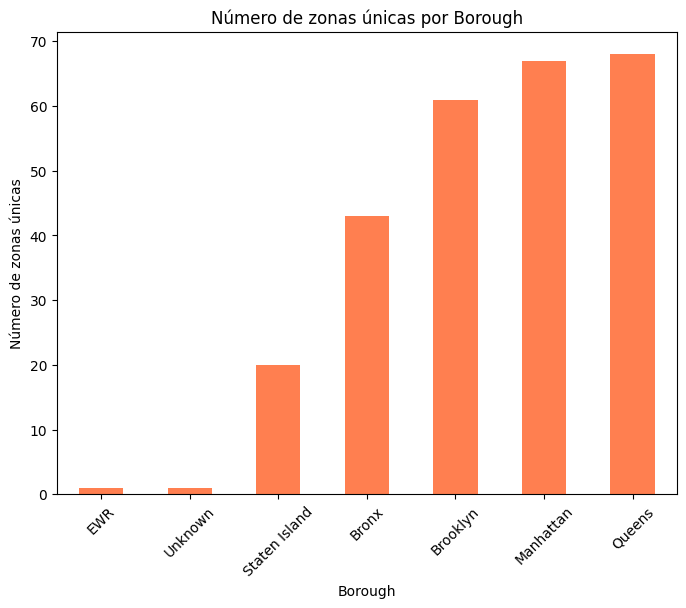

In [20]:
# Número de zonas únicas por Borough
zones_per_borough = dataset.groupby('Borough')['Zone'].nunique()

# Gráfico de barras
plt.figure(figsize=(8, 6))
zones_per_borough.sort_values().plot(kind='bar', color='coral')
plt.title("Número de zonas únicas por Borough")
plt.ylabel("Número de zonas únicas")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.show()


# Creación de columna de long y latit

In [21]:

# Cargar el dataset principal y el dataset de localización
main_dataset_path = "taxi+_zone_lookup.csv"
locations_dataset_path = "coordenadaszonas.csv"  # Cambia esto por la ruta real del dataset de localización

main_dataset = pd.read_csv(main_dataset_path)
locations_dataset = pd.read_csv(locations_dataset_path)

# Verificar las columnas comunes (en este caso, usamos 'Zone')
print("Columnas en el dataset principal:", main_dataset.columns)
print("Columnas en el dataset de localización:", locations_dataset.columns)

# Realizar la unión de los datasets
merged_dataset = main_dataset.merge(locations_dataset, on="Zone", how="left")

# Guardar el dataset resultante
MergeTaxiZoneLoc = "taxi_zone_merged_with_locations.csv"
merged_dataset.to_csv(MergeTaxiZoneLoc, index=False)

MergeTaxiZoneLoc



Columnas en el dataset principal: Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
Columnas en el dataset de localización: Index(['LocationID', 'Borough', 'Zone', 'service_zone', 'Borough_Latitude',
       'Borough_Longitude', 'Zone_Latitude', 'Zone_Longitude'],
      dtype='object')


'taxi_zone_merged_with_locations.csv'

In [22]:
# Cargar el dataset combinado proporcionado por el usuario
merged_file_path = 'taxi_zone_merged_with_locations.csv'
merged_dataset = pd.read_csv(merged_file_path)

# Agrupar los datos por Zone para calcular la frecuencia de cada zona
frequency_data = merged_dataset.groupby(['Zone', 'Zone_Latitude', 'Zone_Longitude']).size().reset_index(name='Frequency')

# Crear un mapa centrado en Nueva York
import folium
from folium.plugins import HeatMap

nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Agregar círculos para cada zona en función de su frecuencia
for _, row in frequency_data.iterrows():
    if pd.notnull(row['Zone_Latitude']) and pd.notnull(row['Zone_Longitude']):
        folium.Circle(
            location=[row['Zone_Latitude'], row['Zone_Longitude']],
            radius=row['Frequency'] * 10,  # Ajusta el multiplicador según el rango de frecuencias
            color='blue',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            tooltip=f"Zone: {row['Zone']}<br>Frequency: {row['Frequency']}"
        ).add_to(nyc_map)

# Guardar el mapa en un archivo HTML
map_output_path = "nyc_zones_frequency_map.html"
nyc_map.save(map_output_path)

map_output_path


'nyc_zones_frequency_map.html'

# Analisis e insight final. 

1. Diversidad de zonas por distrito
Al analizar el número de zonas únicas (Zone) por cada distrito (Borough), se puede identificar qué distritos tienen mayor diversidad de zonas.
Insight: Un distrito con más zonas podría requerir mayor atención logística o de planificación de servicios (como transporte o regulaciones específicas).
2. Dominancia de ciertas zonas de servicio (service_zone)
Examinar la distribución de la columna service_zone muestra cuáles zonas de servicio son más frecuentes. Por ejemplo:
Insight: Si una zona como "Yellow Zone" domina, puede indicar que gran parte de las actividades (por ejemplo, transporte) están concentradas en ciertas áreas específicas.
3. Categorías más frecuentes
Identificar las zonas (Zone) y distritos (Borough) más comunes puede ayudar a priorizar recursos o estrategias para esos lugares.
Insight: La zona más común puede representar un área de alta demanda que necesita ser monitoreada más de cerca para optimizar servicios como taxis, entregas o infraestructura.
4. Relación entre Borough y service_zone
El mapa de calor entre Borough y service_zone puede mostrar cómo se distribuyen las zonas de servicio por distrito.
Insight: Si algunas combinaciones son poco comunes o ausentes, puede ser una oportunidad para expandir servicios en áreas no cubiertas.
5. Patrones de concentración
Si ciertas categorías (por ejemplo, una zona específica) dominan el dataset, esto puede revelar un sesgo geográfico en los datos.
Insight: Esto podría ser útil para equilibrar recursos en otras zonas menos representadas o evaluar si los datos reflejan adecuadamente toda la región.
6. Identificación de anomalías o datos faltantes
Detectar valores nulos o distribuciones anómalas podría revelar problemas de calidad de datos.
Insight: Por ejemplo, si un distrito tiene pocas o ninguna zona asociada, podría indicar un error en los datos o una falta real de actividad en esa área.
7. Comparación entre distritos
Comparar el tamaño relativo de las categorías entre distritos ayuda a identificar diferencias geográficas en actividad o infraestructura.
Insight: Si un distrito tiene significativamente más zonas que otro, podría reflejar diferencias en urbanización o uso del terreno.
Aplicaciones prácticas de estos insights
Logística y transporte: Identificar qué zonas y distritos requieren más atención.
Planificación urbana: Evaluar cómo se distribuyen los servicios en relación con los distritos.
Estrategias comerciales: Decidir dónde expandir operaciones en función de la concentración de zonas y la demanda.
